In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
daily_data = pd.read_csv('Data/Parquet/agg/agg_daily_level.csv')
item_data = pd.read_csv('Data/Parquet/agg/agg_item_level.csv')
store_data = pd.read_csv('Data/Parquet/agg/agg_store_level.csv')

In [17]:
daily_data.head()

,date_id,day_of_month,day_name,month,year,total_units_sold,total_revenue,num_items_sold,num_stores,avg_price_per_unit
0,2011-01-29,d_1,Monday,1,2011,32631,85169.03,3049,10,2.610065
1,2011-01-30,d_2,Tuesday,1,2011,31749,82365.61,3049,10,2.594274
2,2011-01-31,d_3,Wednesday,1,2011,23783,60043.87,3049,10,2.524655
3,2011-02-01,d_4,Thursday,2,2011,25412,63610.70,3049,10,2.503176
4,2011-02-02,d_5,Friday,2,2011,19146,49102.08,3049,10,2.564613


In [18]:
item_data.head()

,item_id,item_name,dept_id,cat_id,price,currency,total_units_sold,total_revenue,num_stores_sold,num_days_sold,avg_price
0,FOODS_3_586,FOODS_3_586,FOODS_3,FOODS,1.60,USD,920242,1472387.20,10,1913,1.600000
1,FOODS_3_120,FOODS_3_120,FOODS_3,FOODS,4.98,USD,283104,1409654.49,10,1913,4.979281
2,FOODS_3_090,FOODS_3_090,FOODS_3,FOODS,1.36,USD,1002529,1369298.51,10,1913,1.365844
3,FOODS_3_202,FOODS_3_202,FOODS_3,FOODS,4.26,USD,295689,1255329.01,10,1913,4.245437
4,FOODS_3_587,FOODS_3_587,FOODS_3,FOODS,2.52,USD,396119,992207.52,10,1913,2.504822


In [19]:
store_data.head()

,store_id,store_name,state_id,state_name,region,type,size,total_units_sold,total_revenue,num_items_sold,num_days_sold,avg_price
0,CA_3,CA_3,CA,California,West,regular,10006,11188180,32068110.30,3049,1913,2.866249
1,CA_1,CA_1,CA,California,West,regular,10008,7698216,22630931.76,3049,1913,2.939763
2,TX_2,TX_2,TX,Texas,South,regular,10001,7214384,20626014.26,3049,1913,2.859013
3,TX_3,TX_3,TX,Texas,South,regular,10002,6089330,17897224.54,3049,1913,2.939112
4,WI_2,WI_2,WI,Wisconsin,Midwest,regular,10009,6544012,17766786.81,3049,1913,2.714969


# Phân tích cấp độ toàn hệ thống (daily_level)

## Chu kỳ bán hàng (seasonality)

### Phân tích biến động theo tuần, tháng, quý, hoặc theo ngày trong tuần (weekday pattern).

In [20]:
# Xử lý dữ liệu daily_data để phân tích seasonality
import datetime

# Giả sử date_id là string dạng 'YYYY-MM-DD', chuyển thành datetime
daily_data['date'] = pd.to_datetime(daily_data['date_id'])

# Thêm cột quarter
daily_data['quarter'] = daily_data['date'].dt.quarter

# Thêm cột weekday (0=Monday, 6=Sunday)
daily_data['weekday'] = daily_data['date'].dt.weekday

# Hiển thị dữ liệu sau xử lý
daily_data.head()

,date_id,day_of_month,day_name,month,year,total_units_sold,total_revenue,num_items_sold,num_stores,avg_price_per_unit,date,quarter,weekday
0,2011-01-29,d_1,Monday,1,2011,32631,85169.03,3049,10,2.610065,2011-01-29,1,5
1,2011-01-30,d_2,Tuesday,1,2011,31749,82365.61,3049,10,2.594274,2011-01-30,1,6
2,2011-01-31,d_3,Wednesday,1,2011,23783,60043.87,3049,10,2.524655,2011-01-31,1,0
3,2011-02-01,d_4,Thursday,2,2011,25412,63610.70,3049,10,2.503176,2011-02-01,1,1
4,2011-02-02,d_5,Friday,2,2011,19146,49102.08,3049,10,2.564613,2011-02-02,1,2


### Phân tích biến động theo tháng

[11:51:07] INFO     Using categorical units to plot a list of   category.py:224
                    strings that are all parsable as floats or                 
                    dates. If these strings should be plotted                  
                    as numbers, cast to the appropriate data                   
                    type before plotting.                                      
           INFO     Using categorical units to plot a list of   category.py:224
                    strings that are all parsable as floats or                 
                    dates. If these strings should be plotted                  
                    as numbers, cast to the appropriate data                   
                    type before plotting.                                      


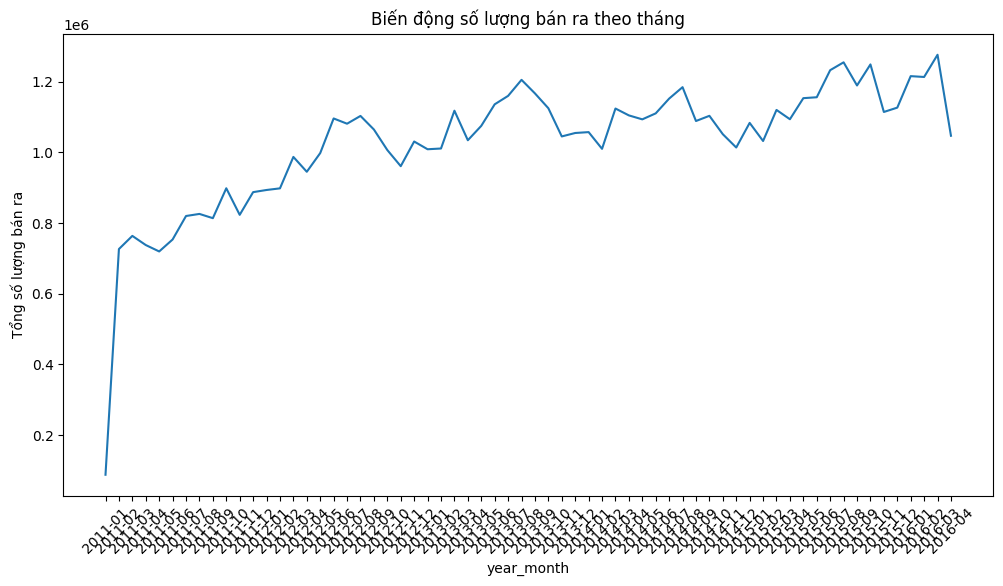

In [21]:
# Phân tích biến động theo tháng
monthly_sales = daily_data.groupby(['year', 'month'])['total_units_sold'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='year_month', y='total_units_sold')
plt.title('Biến động số lượng bán ra theo tháng')
plt.ylabel('Tổng số lượng bán ra')
plt.xticks(rotation=45)
plt.show()

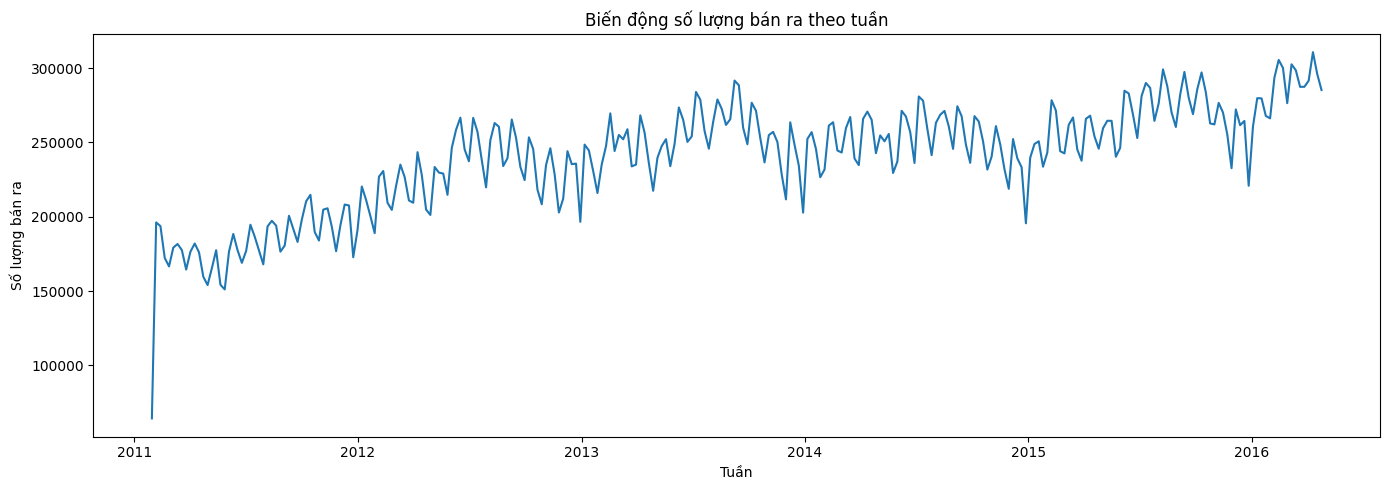

In [22]:
weekly_data = daily_data.resample('W', on='date')['total_units_sold'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(
    data=weekly_data,
    x='date',
    y='total_units_sold'
)
plt.title('Biến động số lượng bán ra theo tuần')
plt.xlabel('Tuần')
plt.ylabel('Số lượng bán ra')
plt.tight_layout()
plt.show()

### Phân tích biến động theo năm

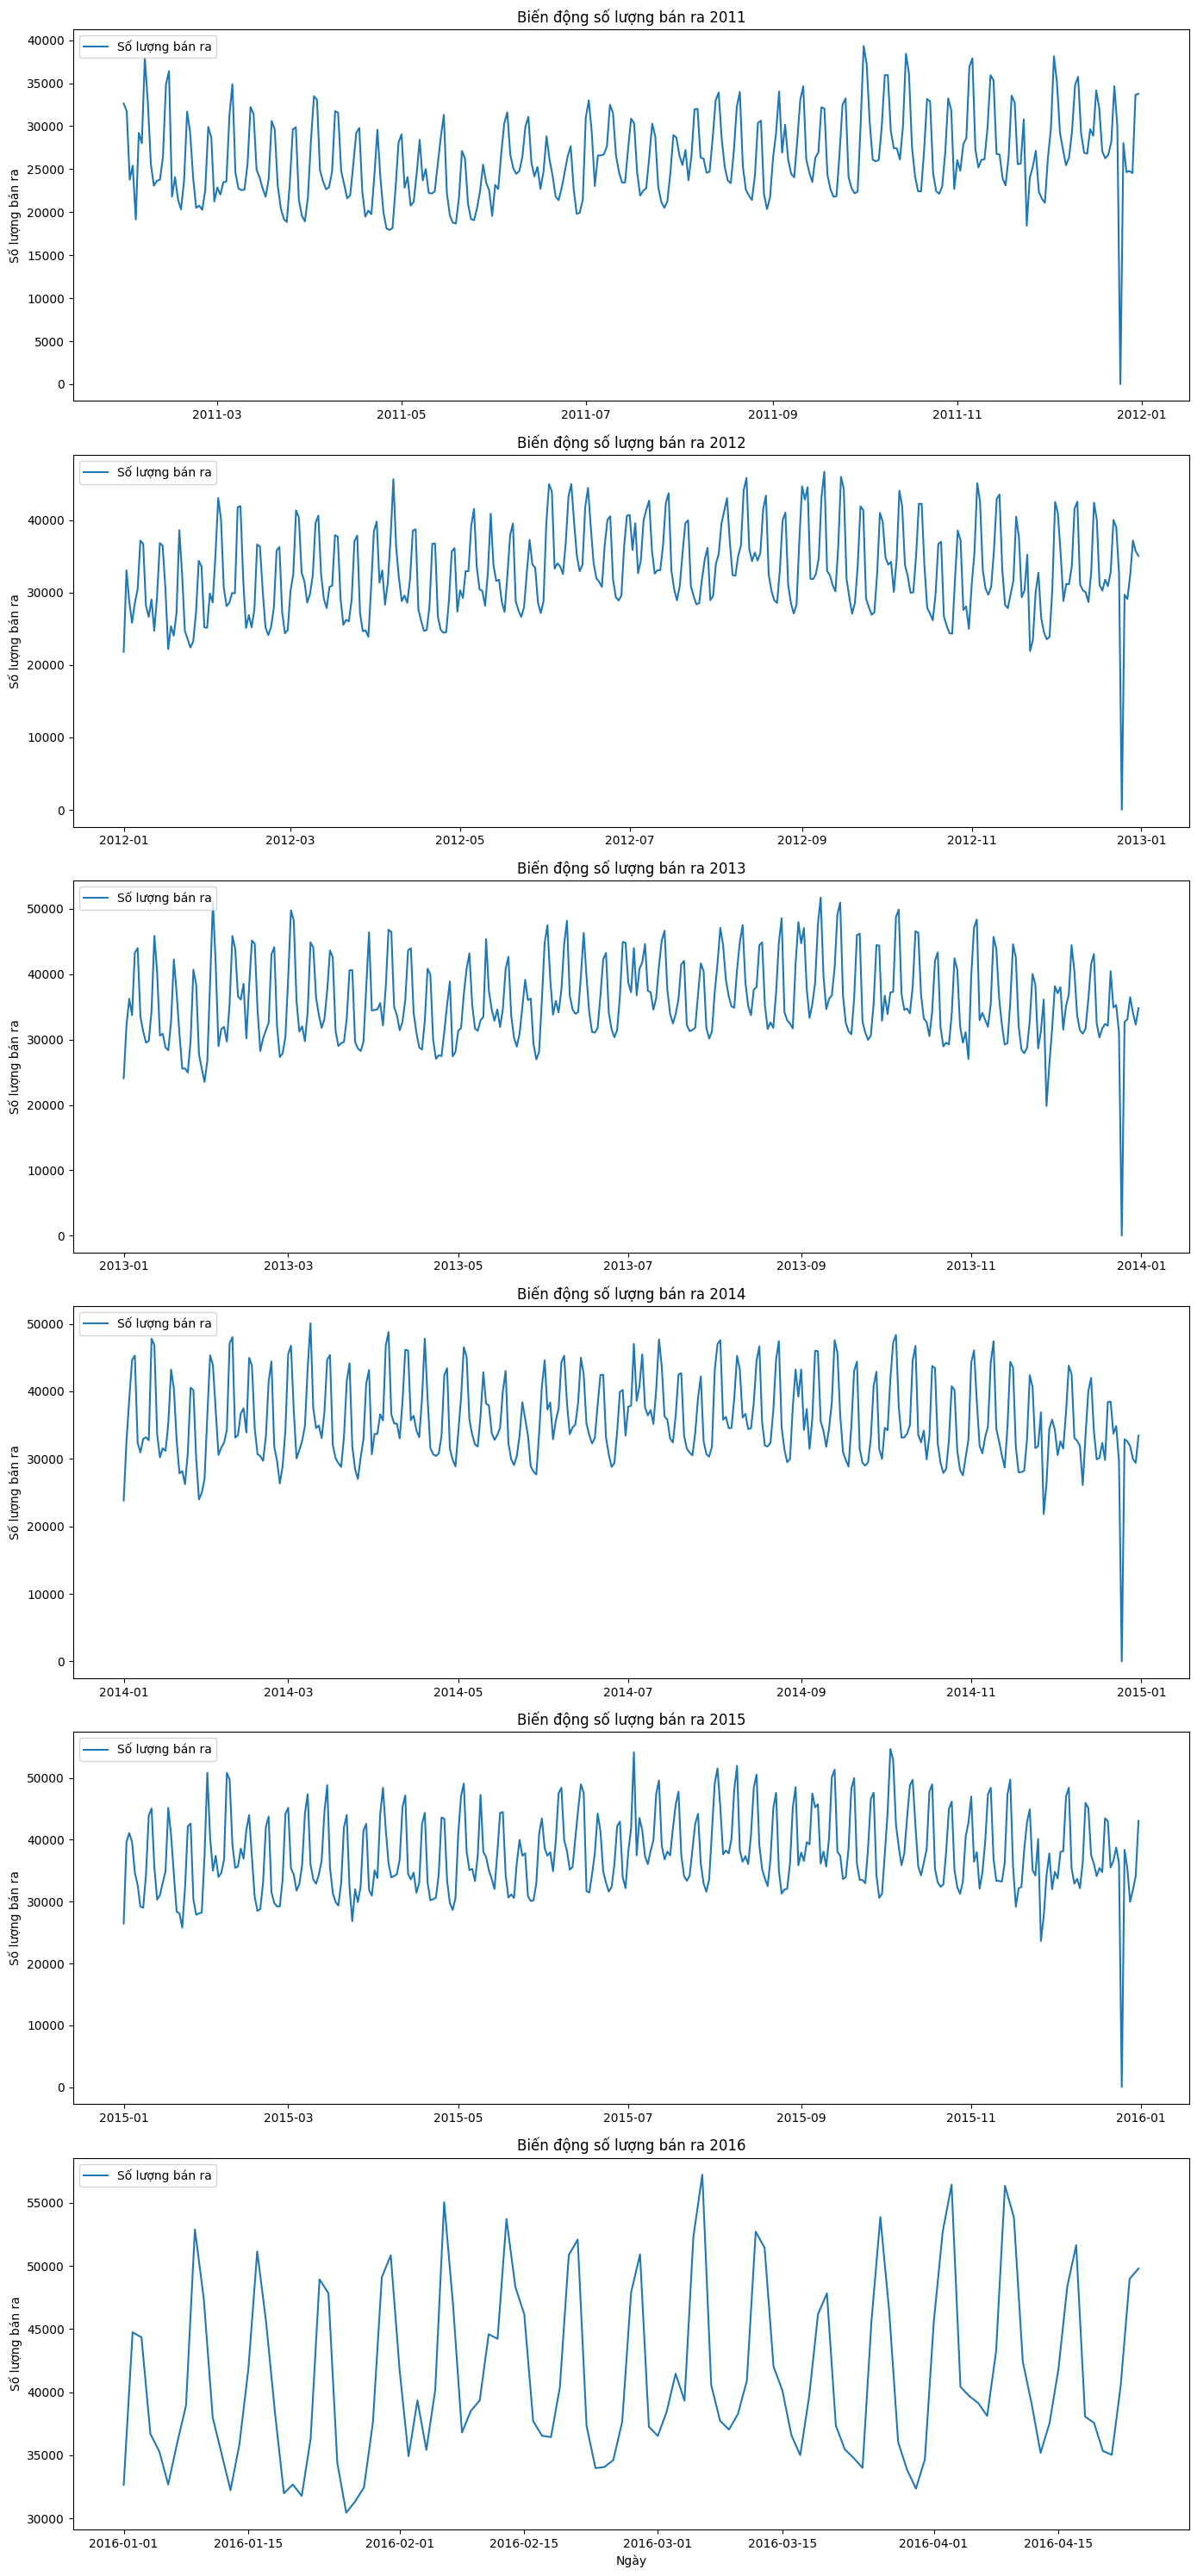

In [ ]:

# Lấy danh sách các năm trong dữ liệu
years = daily_data['year'].unique()

plt.figure(figsize=(14, 5 * len(years)))

for i, year in enumerate(sorted(years), 1):
    plt.subplot(len(years), 1, i)

    yearly_data = daily_data[daily_data['year'] == year]

    sns.lineplot(
        data=yearly_data,
        x='date',
        y='total_units_sold',
        label='Số lượng bán ra'
    )

    plt.title(f'Biến động số lượng bán ra {year}')
    plt.xlabel('')
    plt.ylabel('Số lượng bán ra')
    plt.legend(loc='upper left')

plt.xlabel('Ngày')
plt.tight_layout()
plt.show()

Số giá trị bị thiếu: 0
Tổng số quan sát: 1913
┌───────────────────────────────── ⚠️ Warning ─────────────────────────────────┐
│ FutureWarning in                                                            │
│ C:\Users\Admin\AppData\Local\Temp\ipykernel_23668\727342542.py:11           │
│ Series.fillna with 'method' is deprecated and will raise in a future        │
│ version. Use obj.ffill() or obj.bfill() instead.                            │
└─────────────────────────────────────────────────────────────────────────────┘


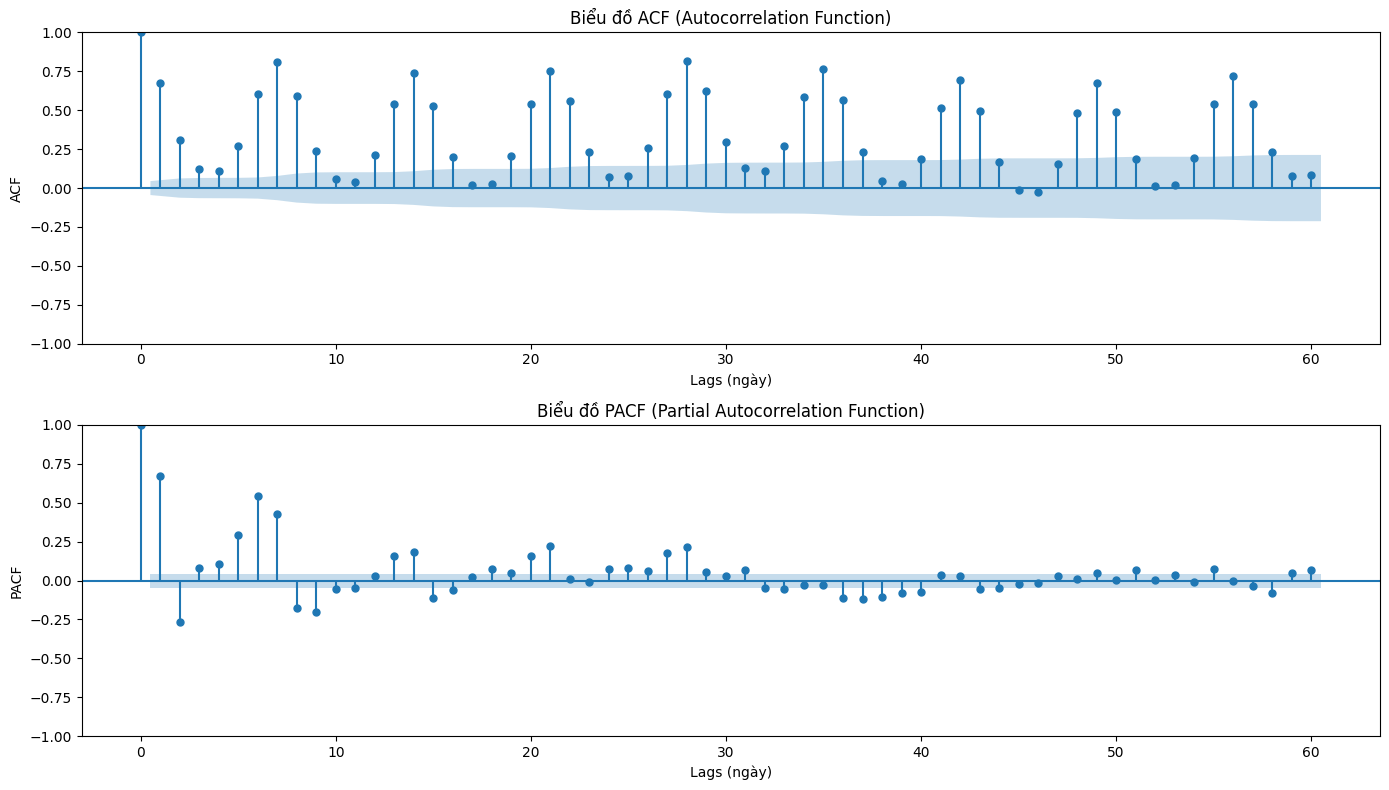


Giải thích:
- ACF cho thấy mối tương quan giữa giá trị hiện tại và các giá trị quá khứ
- PACF cho thấy mối tương quan riêng phần (loại trừ ảnh hưởng gián tiếp)
- Các spike vượt qua đường xanh (confidence interval) là các lags quan trọng


In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Chuẩn bị dữ liệu: Sắp xếp theo ngày và lấy chuỗi số lượng bán ra
daily_ts = daily_data.sort_values('date').set_index('date')['total_units_sold']

# Kiểm tra dữ liệu có bị thiếu không
print(f"Số giá trị bị thiếu: {daily_ts.isna().sum()}")
print(f"Tổng số quan sát: {len(daily_ts)}")

# Điền giá trị bị thiếu nếu có (dùng forward fill)
daily_ts = daily_ts.fillna(method='ffill')

# Tạo biểu đồ ACF và PACF
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# ACF plot
plot_acf(daily_ts, lags=60, ax=axes[0], title='Biểu đồ ACF (Autocorrelation Function)')
axes[0].set_ylabel('ACF')
axes[0].set_xlabel('Lags (ngày)')

# PACF plot
plot_pacf(daily_ts, lags=60, ax=axes[1], title='Biểu đồ PACF (Partial Autocorrelation Function)', method='ywm')
axes[1].set_ylabel('PACF')
axes[1].set_xlabel('Lags (ngày)')

plt.tight_layout()
plt.show()

print("\nGiải thích:")
print("- ACF cho thấy mối tương quan giữa giá trị hiện tại và các giá trị quá khứ")
print("- PACF cho thấy mối tương quan riêng phần (loại trừ ảnh hưởng gián tiếp)")
print("- Các spike vượt qua đường xanh (confidence interval) là các lags quan trọng")


## Phân tích ACF (Autocorrelation Function) và PACF (Partial Autocorrelation Function)

### Phân tích biến động theo ngày trong tuần (weekday pattern)

[11:51:10] INFO     Using categorical units to plot a list of   category.py:224
                    strings that are all parsable as floats or                 
                    dates. If these strings should be plotted                  
                    as numbers, cast to the appropriate data                   
                    type before plotting.                                      


           INFO     Using categorical units to plot a list of   category.py:224
                    strings that are all parsable as floats or                 
                    dates. If these strings should be plotted                  
                    as numbers, cast to the appropriate data                   
                    type before plotting.                                      


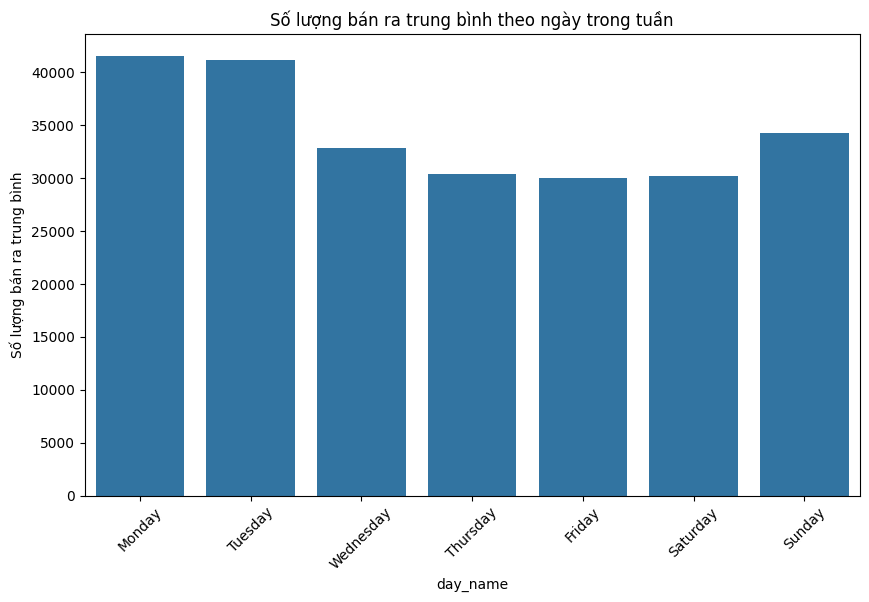

In [25]:
# Phân tích biến động theo ngày trong tuần
weekday_sales = daily_data.groupby('day_name')['total_units_sold'].mean().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['day_name'] = pd.Categorical(weekday_sales['day_name'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('day_name')

plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_sales, x='day_name', y='total_units_sold')
plt.title('Số lượng bán ra trung bình theo ngày trong tuần')
plt.ylabel('Số lượng bán ra trung bình')
plt.xticks(rotation=45)
plt.show()

In [26]:
# đọc file calendar để join với daily_data phân tích sự kiện đặc biệt
calendar_data = pd.read_csv('Data/Raw/calendar.csv')

In [27]:
# join daily_data với calendar_data để lấy thông tin sự kiện
# đảm bảo cả hai cột 'date' có cùng dtype datetime64[ns] trước khi merge
calendar_data['date'] = pd.to_datetime(calendar_data['date'])
daily_data = daily_data.merge(calendar_data[['date', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']], on='date', how='left')
daily_data.head()

,date_id,day_of_month,day_name,month,year,total_units_sold,total_revenue,num_items_sold,num_stores,avg_price_per_unit,date,quarter,weekday,event_name_1,event_name_2,event_type_1,event_type_2
0,2011-01-29,d_1,Monday,1,2011,32631,85169.03,3049,10,2.610065,2011-01-29,1,5,NaN,NaN,NaN,NaN
1,2011-01-30,d_2,Tuesday,1,2011,31749,82365.61,3049,10,2.594274,2011-01-30,1,6,NaN,NaN,NaN,NaN
2,2011-01-31,d_3,Wednesday,1,2011,23783,60043.87,3049,10,2.524655,2011-01-31,1,0,NaN,NaN,NaN,NaN
3,2011-02-01,d_4,Thursday,2,2011,25412,63610.70,3049,10,2.503176,2011-02-01,1,1,NaN,NaN,NaN,NaN
4,2011-02-02,d_5,Friday,2,2011,19146,49102.08,3049,10,2.564613,2011-02-02,1,2,NaN,NaN,NaN,NaN


### Insight: Số lượng bán ra thường tăng mạnh vào trước các sự kiện đặc biệt (ví dụ: Christmas, Super Bowl, Easter)

In [ ]:
#Tạo cột "event_name" gộp cả 2 cột sự kiện (nếu có)
daily_data['event_name'] = daily_data[['event_name_1', 'event_name_2']].bfill(axis=1).iloc[:, 0]
daily_data['event_type'] = daily_data[['event_type_1', 'event_type_2']].bfill(axis=1).iloc[:, 0]

#Lấy danh sách các sự kiện có thật trong dữ liệu
unique_events = daily_data['event_name'].dropna().unique()
print(f"Các sự kiện có trong dữ liệu: {list(unique_events)}")

# Số lượng bán ra trung bình toàn bộ
overall_avg = daily_data['total_units_sold'].mean()

# Tính số lượng bán ra trung bình theo từng sự kiện
event_avgs = []
for event in unique_events:
    event_data = daily_data[daily_data['event_name'] == event]

    event_dates = event_data['date']
    mask = daily_data['date'].isin(event_dates) | daily_data['date'].isin(event_dates - pd.Timedelta(days=1)) | daily_data['date'].isin(event_dates - pd.Timedelta(days=2))
    event_window_data = daily_data[mask]

    event_avg = event_window_data['total_units_sold'].mean()
    event_avgs.append({'event_name': event, 'avg_units_sold': event_avg})

event_df = pd.DataFrame(event_avgs)
event_df = event_df.sort_values('avg_units_sold', ascending=False)

# Thêm hàng tổng thể để so sánh
event_df = pd.concat([
    pd.DataFrame([{'event_name': 'Overall', 'avg_units_sold': overall_avg}]),
    event_df
], ignore_index=True)

# In kết quả
print(event_df)

Các sự kiện có trong dữ liệu: ['SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart', 'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster', 'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay', 'NBAFinalsStart', 'NBAFinalsEnd', "Father's day", 'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay', 'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay', 'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear', 'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter']
             event_name  avg_units_sold
0               Overall    34341.562467
1                Easter    42931.533333
2              LaborDay    41804.933333
3             SuperBowl    41391.666667
4           ColumbusDay    41087.800000
5         PresidentsDay    39271.666667
6   MartinLutherKingDay    39047.133333
7       IndependenceDay    37884.600000
8          Father's day    37848.416667
9         ValentinesDay    37117.888889
10          VeteransDay    36547.600000
11       OrthodoxEaster   

In [29]:
# Loại bỏ hàng Overall nếu có
events_only = event_df[event_df['event_name'] != 'Overall'].copy()

# Tạo mapping event_name -> event_type từ daily_data (chỉ lấy 1 giá trị nếu có nhiều)
event_type_map = (
	daily_data[['event_name', 'event_type']]
	.dropna()
	.drop_duplicates(subset=['event_name'])
	.set_index('event_name')['event_type']
)

# Gộp event_type vào events_only; nếu thiếu thì gán 'Unknown'
events_only = events_only.merge(event_type_map.rename('event_type'),
								left_on='event_name', right_index=True, how='left')
events_only['event_type'] = events_only['event_type'].fillna('Unknown')

# Tính số lượng bán ra trung bình theo nhóm event_type
grouped = events_only.groupby('event_type', as_index=False)['avg_units_sold'].mean()

# Thêm Overall để so sánh
overall_avg = event_df.loc[event_df['event_name'] == 'Overall', 'avg_units_sold'].values[0]
grouped['delta_%'] = (grouped['avg_units_sold'] - overall_avg) / overall_avg * 100

# Sắp xếp theo số lượng bán ra giảm dần
grouped = grouped.sort_values('avg_units_sold', ascending=False)

┌───────────────────────────────── ⚠️ Warning ─────────────────────────────────┐
│ FutureWarning in                                                            │
│ C:\Users\Admin\AppData\Local\Temp\ipykernel_23668\3268784928.py:2           │
│                                                                             │
│                                                                             │
│ Passing `palette` without assigning `hue` is deprecated and will be removed │
│ in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the │
│ same effect.                                                                │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘


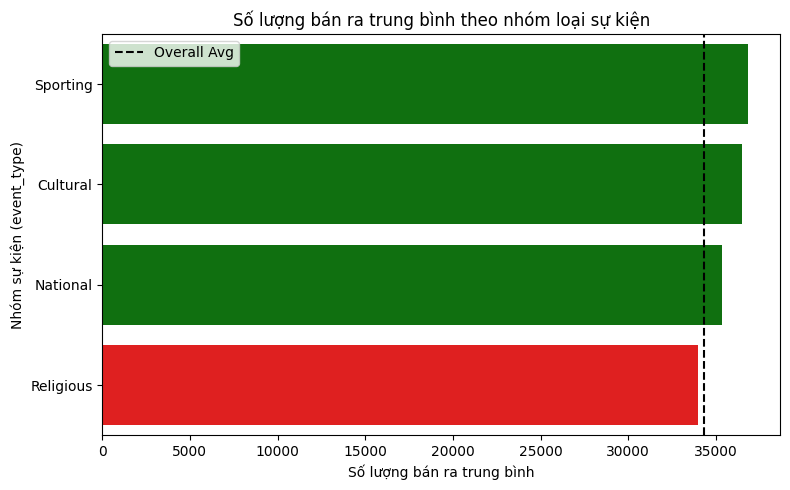

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=grouped,
    x='avg_units_sold',
    y='event_type',
    palette=['green' if x > 0 else 'red' for x in grouped['delta_%']]
)
plt.axvline(overall_avg, color='black', linestyle='--', label='Overall Avg')
plt.title('Số lượng bán ra trung bình theo nhóm loại sự kiện')
plt.xlabel('Số lượng bán ra trung bình')
plt.ylabel('Nhóm sự kiện (event_type)')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
daily_data.head()

,date_id,day_of_month,day_name,month,year,total_units_sold,total_revenue,num_items_sold,num_stores,avg_price_per_unit,date,quarter,weekday,event_name_1,event_name_2,event_type_1,event_type_2,event_name,event_type
0,2011-01-29,d_1,Monday,1,2011,32631,85169.03,3049,10,2.610065,2011-01-29,1,5,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-30,d_2,Tuesday,1,2011,31749,82365.61,3049,10,2.594274,2011-01-30,1,6,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-31,d_3,Wednesday,1,2011,23783,60043.87,3049,10,2.524655,2011-01-31,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-02-01,d_4,Thursday,2,2011,25412,63610.70,3049,10,2.503176,2011-02-01,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-02-02,d_5,Friday,2,2011,19146,49102.08,3049,10,2.564613,2011-02-02,1,2,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Danh sách sự kiện có trong dữ liệu
events_list = daily_data['event_name'].dropna().unique()

# Khoảng thời gian 'before' và 'after'
days_before = 10
days_after = 10

# Lưu kết quả trung bình từng giai đoạn
event_phase_sales = []

for event in events_list:
    # Ngày diễn ra sự kiện
    event_dates = daily_data.loc[daily_data['event_name'] == event, 'date']

    for date in event_dates:
        # Mask cho các giai đoạn
        before_mask = (daily_data['date'] >= date - pd.Timedelta(days=days_before)) & (daily_data['date'] < date)
        during_mask = (daily_data['date'] == date)
        after_mask = (daily_data['date'] > date) & (daily_data['date'] <= date + pd.Timedelta(days=days_after))

        # Tính trung bình
        for phase, mask in zip(['Before', 'During', 'After'], [before_mask, during_mask, after_mask]):
            avg_units = daily_data.loc[mask, 'total_units_sold'].mean()
            event_phase_sales.append({'event_name': event, 'phase': phase, 'avg_units_sold': avg_units})

# Chuyển sang DataFrame
phase_df = pd.DataFrame(event_phase_sales)

In [33]:
# Gộp theo event_type
phase_df = phase_df.merge(
    daily_data[['event_name', 'event_type']].drop_duplicates(),
    on='event_name',
    how='left'
)

grouped_phase = phase_df.groupby(['event_type', 'phase'])['avg_units_sold'].mean().reset_index()

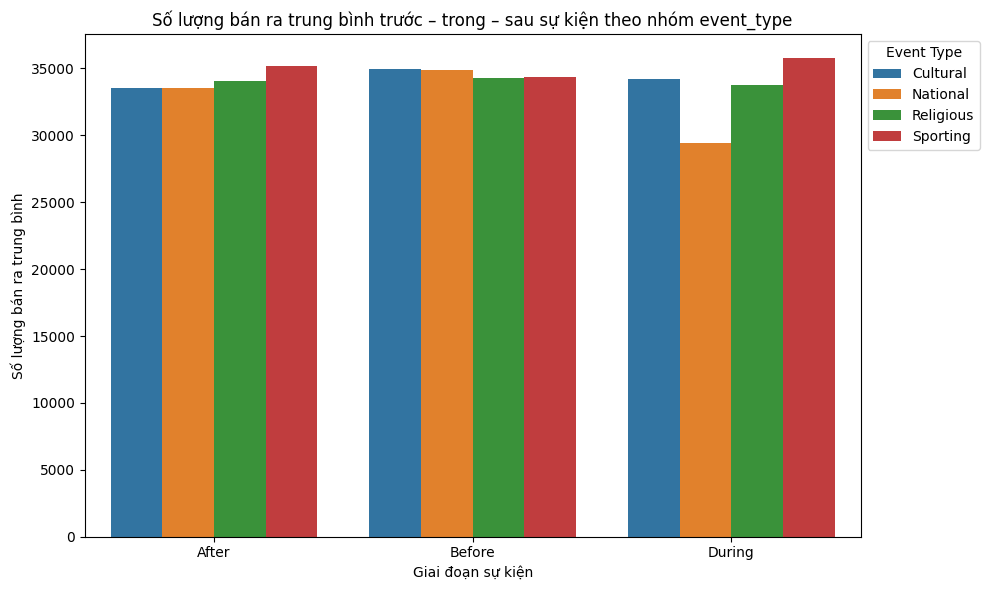

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_phase,
    x='phase',
    y='avg_units_sold',
    hue='event_type'
)
plt.title('Số lượng bán ra trung bình trước – trong – sau sự kiện theo nhóm event_type')
plt.ylabel('Số lượng bán ra trung bình')
plt.xlabel('Giai đoạn sự kiện')
plt.legend(title='Event Type', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Phân tích cấp độ sản phẩm (item_level)

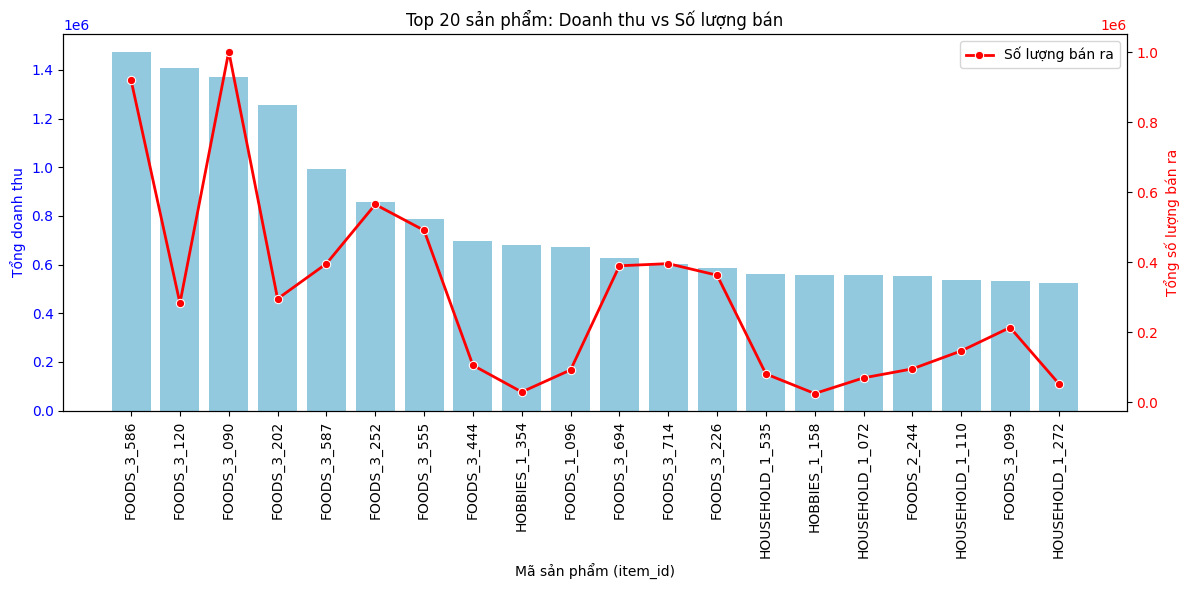

In [35]:
item_summary = item_data.groupby('item_id').agg(
    total_revenue=('total_revenue', 'sum'),
    total_units_sold=('total_units_sold', 'sum')
).reset_index()

# Chọn top 10 theo doanh thu
top_items = item_summary.sort_values('total_revenue', ascending=False).head(20)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar cho doanh thu
sns.barplot(
    data=top_items,
    x='item_id',
    y='total_revenue',
    ax=ax1,
    color='skyblue'
)
ax1.set_ylabel('Tổng doanh thu', color='blue')
ax1.set_xlabel('Mã sản phẩm (item_id)')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Line chart cho số lượng bán, chia trục y phụ
ax2 = ax1.twinx()
sns.lineplot(
    data=top_items,
    x='item_id',
    y='total_units_sold',
    ax=ax2,
    color='red',
    marker='o',
    linewidth=2,
    label='Số lượng bán ra'
)
ax2.set_ylabel('Tổng số lượng bán ra', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title & legend
plt.title('Top 20 sản phẩm: Doanh thu vs Số lượng bán')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [36]:
item_summary = item_data.groupby('item_id').agg(
    avg_price=('price', 'mean'),
    total_units_sold=('total_units_sold', 'sum')
).reset_index()

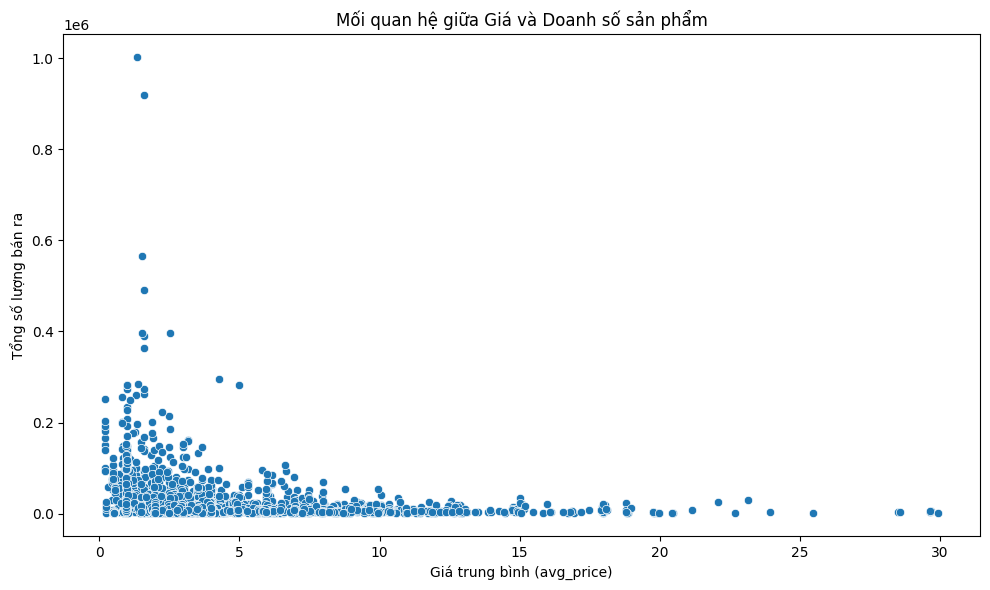

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=item_summary,
    x='avg_price',
    y='total_units_sold'
)
plt.title('Mối quan hệ giữa Giá và Doanh số sản phẩm')
plt.xlabel('Giá trung bình (avg_price)')
plt.ylabel('Tổng số lượng bán ra')
plt.tight_layout()
plt.show()


In [38]:
# Lấy log để tính elasticity
item_summary['log_price'] = np.log(item_summary['avg_price'])
item_summary['log_qty'] = np.log(item_summary['total_units_sold'])

# Fit line log-log
from sklearn.linear_model import LinearRegression

X = item_summary['log_price'].values.reshape(-1, 1)
y = item_summary['log_qty'].values

model = LinearRegression()
model.fit(X, y)

price_elasticity = model.coef_[0]
print(f"Elasticity tổng thể (slope log-log): {price_elasticity:.2f}")


Elasticity tổng thể (slope log-log): -0.65


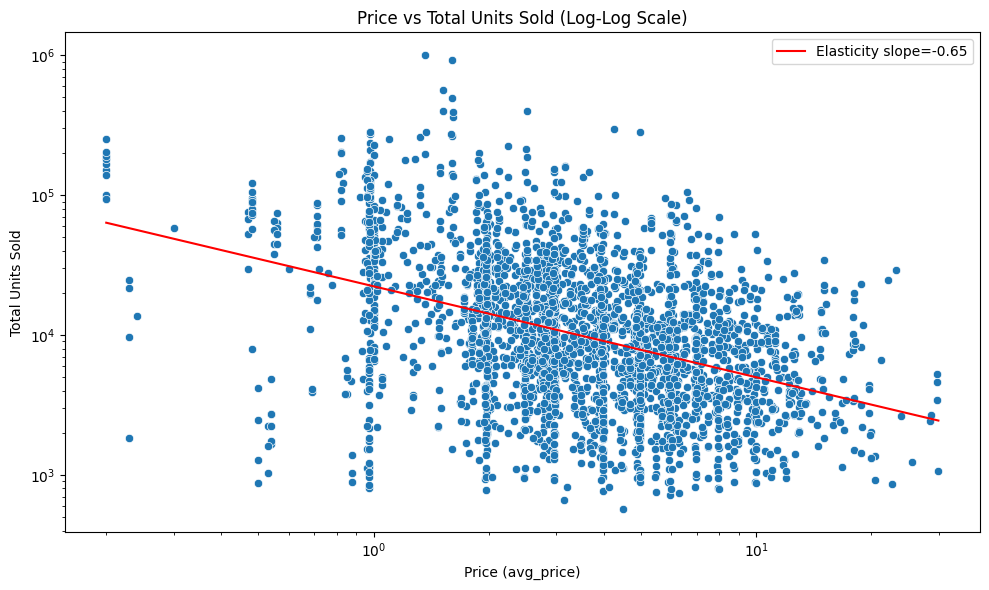

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_price', y='total_units_sold', data=item_summary)
plt.xscale('log')
plt.yscale('log')

# Vẽ trend line từ model log-log
x_vals = np.linspace(item_summary['avg_price'].min(), item_summary['avg_price'].max(), 100)
y_vals = np.exp(model.intercept_) * x_vals**price_elasticity
plt.plot(x_vals, y_vals, color='red', label=f'Elasticity slope={price_elasticity:.2f}')

plt.title('Price vs Total Units Sold (Log-Log Scale)')
plt.xlabel('Price (avg_price)')
plt.ylabel('Total Units Sold')
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
# Tổng hợp số lượng bán ra theo cat_id và dept_id
category_summary = item_data.groupby(['dept_id', 'cat_id']).agg(
    total_units_sold=('total_units_sold', 'sum')
).reset_index()

# Sắp xếp theo số lượng bán ra giảm dần
category_summary = category_summary.sort_values('total_units_sold', ascending=False)

┌───────────────────────────────── ⚠️ Warning ─────────────────────────────────┐
│ UserWarning in                                                              │
│ C:\Users\Admin\AppData\Local\Temp\ipykernel_23668\2761141463.py:14          │
│ No artists with labels found to put in legend.  Note that artists whose     │
│ label start with an underscore are ignored when legend() is called with no  │
│ argument.                                                                   │
└─────────────────────────────────────────────────────────────────────────────┘


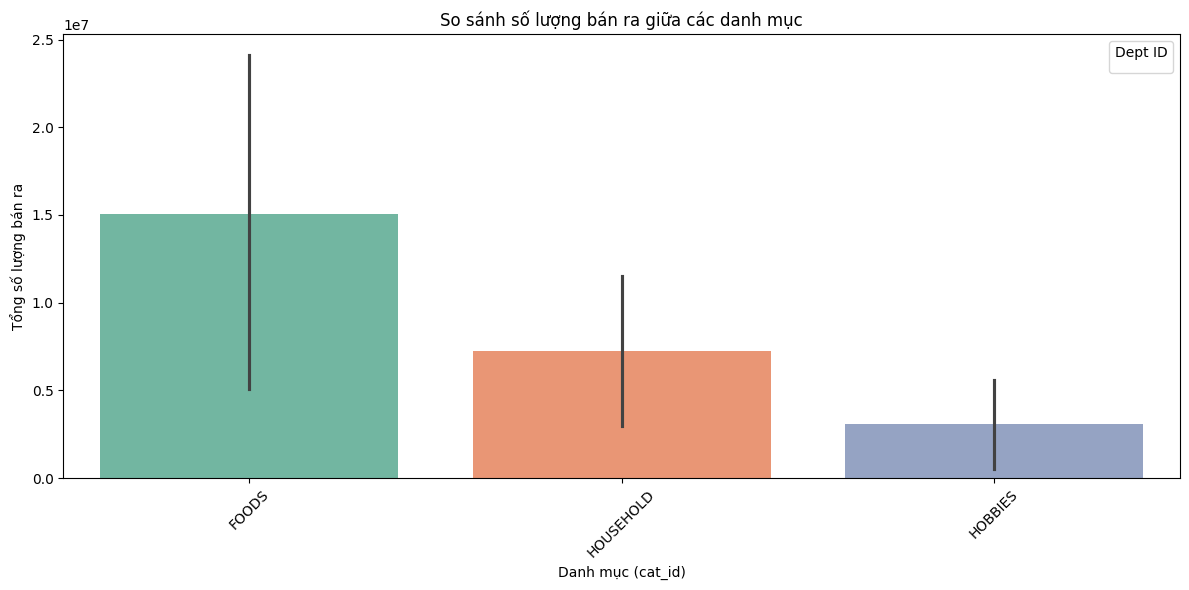

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=category_summary,
    x='cat_id',
    y='total_units_sold',
    hue='cat_id',
    dodge=False,  # đặt True nếu muốn mỗi dept trong cat riêng
    palette='Set2'
)
plt.title('So sánh số lượng bán ra giữa các danh mục')
plt.xlabel('Danh mục (cat_id)')
plt.ylabel('Tổng số lượng bán ra')
plt.xticks(rotation=45)
plt.legend(title='Dept ID', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

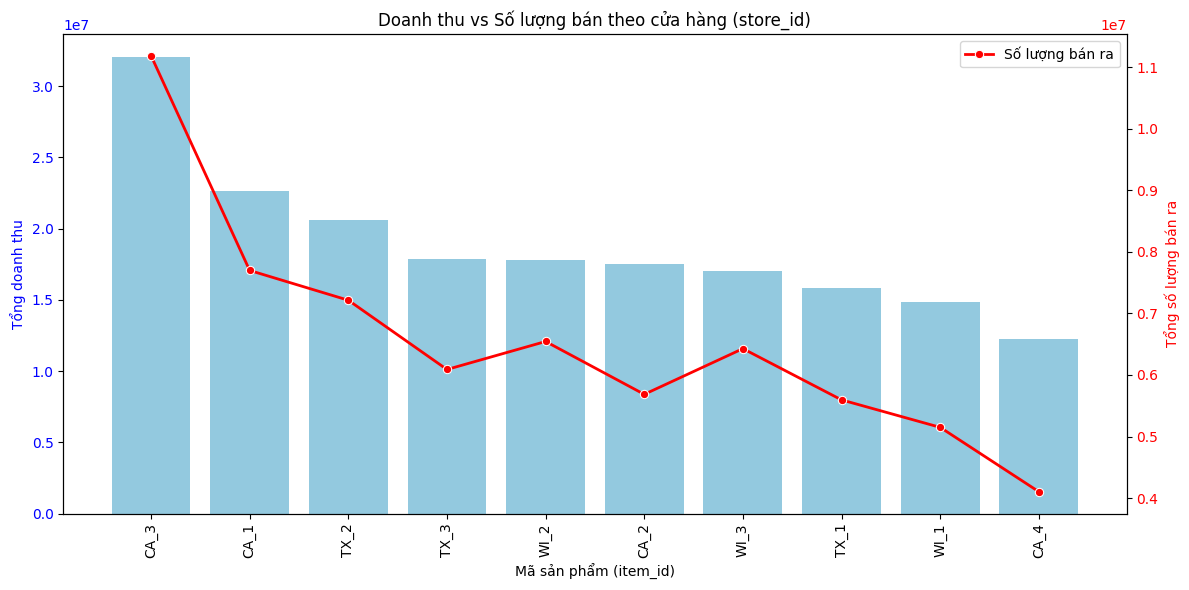

In [42]:
# Total revenue vs total_units_sold heo store_id
store_summary = store_data.groupby('store_id').agg(
    total_revenue=('total_revenue', 'sum'),
    total_units_sold=('total_units_sold', 'sum')
).reset_index()

# Chọn top 10 theo doanh thu
top_store = store_summary.sort_values('total_revenue', ascending=False).head(20)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar cho doanh thu
sns.barplot(
    data=top_store,
    x='store_id',
    y='total_revenue',
    ax=ax1,
    color='skyblue'
)
ax1.set_ylabel('Tổng doanh thu', color='blue')
ax1.set_xlabel('Mã sản phẩm (item_id)')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Line chart cho số lượng bán, chia trục y phụ
ax2 = ax1.twinx()
sns.lineplot(
    data=top_store,
    x='store_id',
    y='total_units_sold',
    ax=ax2,
    color='red',
    marker='o',
    linewidth=2,
    label='Số lượng bán ra'
)
ax2.set_ylabel('Tổng số lượng bán ra', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title & legend
plt.title('Doanh thu vs Số lượng bán theo cửa hàng (store_id)')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


